Analytics & Data Science

Universidad de Antioquia - ML2

Febrero 2024

Melissa Ortega Alzate CC.1036964792

# Libraries

In [57]:
# Data manipulation
import numpy as np
from sklearn import cluster, datasets, mixture

# Visualization
import matplotlib.pyplot as plt

# klearn clustering algorithms
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn_extra.cluster import KMedoids
from sklearn import datasets
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs

# Warnings ignoring
import warnings
warnings.filterwarnings("ignore")

# Functions

In [58]:
# Create function to implement clustering algorithms
def clustering_algorithm(X, algorithm, n_clusters=None):
    """
    Apply a clustering algorithm to a given dataset and compute the silhouette score.

    Parameters:
    X (array-like): Input dataset.
    algorithm (str): Name of the clustering algorithm (Eg. 'KMeans' or 'Spectral').
    n_clusters (int, optional): Number of clusters. Default is None.

    Returns:
    labels (array): Cluster labels assigned to each sample.
    score (float): Silhouette score computed for the dataset and cluster labels.

    """
    algorithms = {
        'KMeans': KMeans(n_clusters=n_clusters, random_state=42),
        'KMedoids': KMedoids(n_clusters=n_clusters, random_state=42),
        'DBSCAN': DBSCAN(),
        'Spectral': SpectralClustering(n_clusters=n_clusters, random_state=42)
    }
    
    model = algorithms[algorithm]
    labels = model.fit_predict(X)

    try:
        score = silhouette_score(X, labels)
    except:
        score = None
        
    return labels, score

# 4. Implementing K-means and K-medoids

### 4a. K-means

silueta para mis métodos

In [59]:
X = np.random.rand(7,5)
K = 3                       

In [60]:
from unsupervised.clusters.kmeans import KMEANS

kmeans = KMEANS()            # Crea una instancia de la clase KMEANS
clusters = kmeans.fit(K, X)  # Ejecuta el algoritmo de K-means

# Muestra los resultados
print("Clusters:", clusters)

Initial centroids:
 [[0.74856163 0.87690479 0.99906809 0.62376182 0.26718148]
 [0.9496742  0.6588784  0.41406897 0.47893536 0.8685751 ]
 [0.89360095 0.95564443 0.79959171 0.71727639 0.71656121]]

Final centroids:
 [[0.65241493 0.90198718 0.75101302 0.5106829  0.25686446]
 [0.55163823 0.20374739 0.15533994 0.43501588 0.4171589 ]
 [0.89272398 0.79789333 0.55729648 0.62834807 0.76201145]]

Clusters: [2. 1. 2. 0. 0. 2. 1.]


In [61]:
new_data = np.random.rand(7,5)

# Predecir los clusters para los nuevos datos
predicted_clusters = kmeans.predict(new_data)

print("Predicted clusters:", predicted_clusters)

Predicted clusters: [2. 1. 0. 1. 2. 0. 1.]


clusters es un array de NumPy que contiene los índices de clúster para todas las muestras de datos en X. Cada elemento del array corresponde a una muestra (fila) de datos en X y contiene el índice del clúster al que pertenece esa muestra. Por lo tanto, cluster_indices es un array unidimensional. Cada valor en este array representa el índice del clúster asignado a la muestra de datos correspondiente en X.

entonces a la fila 1, le toco el cluster 0
a la fila 2

### 4b. K-medioids

In [62]:
from unsupervised.clusters.kmedoids import KMedoids

# Crear instancia de KMedoids
kmedoids = KMedoids()

# Datos de ejemplo (sustitúyelos con tus propios datos)
X = np.random.rand(7, 5)
K = 3

# Calcular clusters con K-medoids
clusters = kmedoids.fit(K, X)

# Imprimir clusters obtenidos
print("Clusters:", clusters)


Medoids iniciales:
[[0.05160522 0.25117341 0.9331066  0.51154765 0.65116629]
 [0.16238923 0.194235   0.41134696 0.83342178 0.20463652]
 [0.78568651 0.67635748 0.82403818 0.45549847 0.57047833]]

Clusters: [0. 1. 1. 3. 0. 0. 0.]


# 5. Let’s use the newly created modules in unsupervised

In [63]:
# Generar los datos dispersos X
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1
)

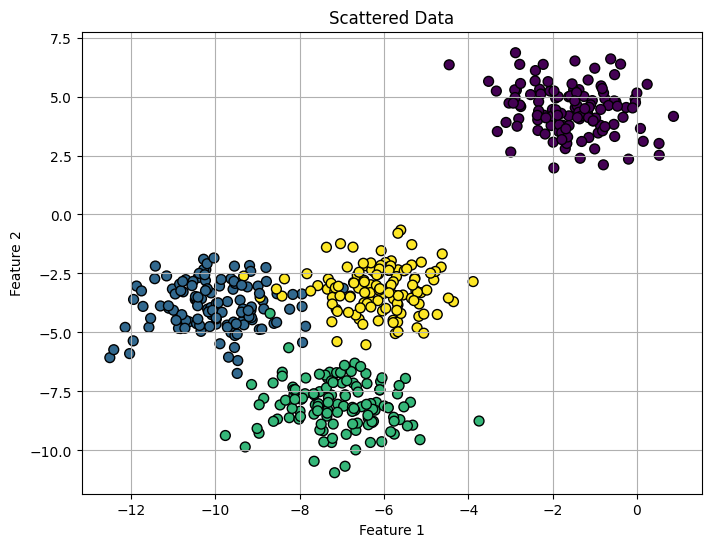

In [64]:
# Tramar el conjunto de datos
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.title('Scattered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


Number of clusters (K): 2
Initial centroids:
 [[ -6.84394443  -4.15058222]
 [-11.75363814  -3.23855895]]

Final centroids:
 [[-1.54234022  4.43517599]
 [-7.75782734 -5.03639416]]

K-means Silhouette Score: 0.7049787496083262


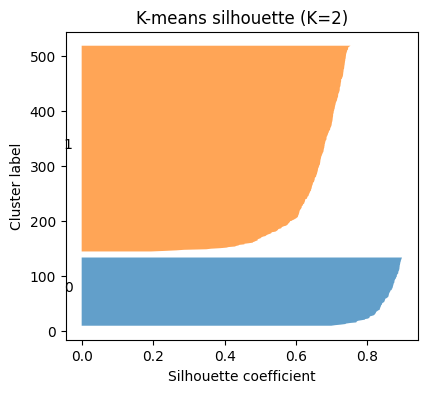

Number of clusters (K): 3
Initial centroids:
 [[ -7.32033002  -2.73350095]
 [-10.10305722  -3.32315288]
 [  0.8687658    4.15785509]]

Final centroids:
 [[-7.09306648 -8.10994454]
 [-8.0862351  -3.5179868 ]
 [-1.54234022  4.43517599]]

K-means Silhouette Score: 0.5882004012129721


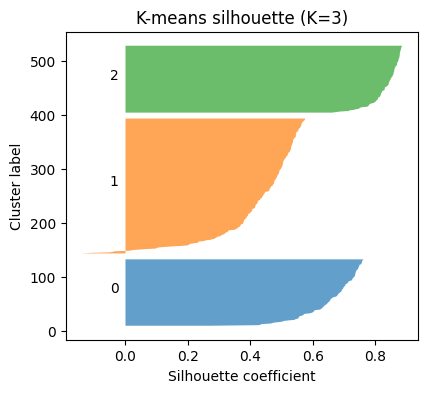

Number of clusters (K): 4
Initial centroids:
 [[-7.16744245 -3.24998378]
 [-8.33534296 -7.87023257]
 [-6.22447869 -2.43846224]
 [-7.31655639 -7.77051293]]

Final centroids:
 [[ -6.08459039  -3.17305983]
 [-10.00969056  -3.84944007]
 [ -1.54234022   4.43517599]
 [ -7.09306648  -8.10994454]]

K-means Silhouette Score: 0.6505186632729437


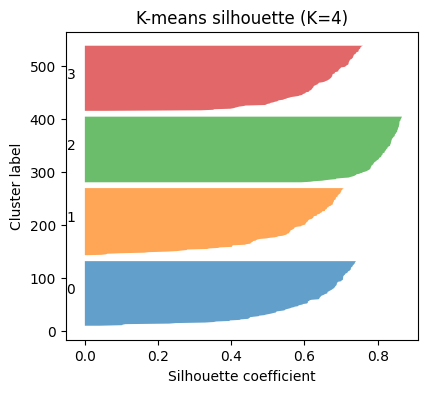

In [65]:
from unsupervised.clusters.kmeans import KMEANS

# Iterar sobre valores de K de 1 a 5
for K in range(2, 5):
    print(f"Number of clusters (K): {K}")

    # K-means
    kmeans = KMEANS()
    kmeans_clusters = kmeans.fit(K, X)
    kmeans_silhouette = silhouette_score(X, kmeans_clusters)
    print("K-means Silhouette Score:", kmeans_silhouette)

    # Plot Silhouette plot for K-means
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(f"K-means silhouette (K={K})")
    silhouette_scores = silhouette_samples(X, kmeans_clusters)
    y_lower = 10
    
    for i in range(K):
        ith_cluster_silhouette_values = silhouette_scores[kmeans_clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.xlabel("Silhouette coefficient")
    plt.ylabel("Cluster label")
    plt.show()


Number of clusters (K): 2
Medoids iniciales:
[[-5.46045264 -2.30831553]
 [-7.09669936 -8.04074036]]



K-medoids Silhouette Score: 0.3180382585034115


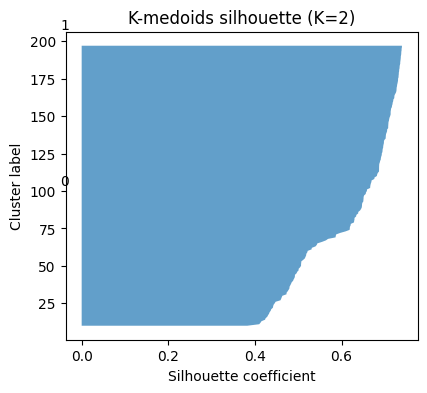

Number of clusters (K): 3
Medoids iniciales:
[[-6.75264349 -8.34654975]
 [-0.81339926  3.54697393]
 [-9.18886814 -2.16359386]]

K-medoids Silhouette Score: 0.5867656722964266


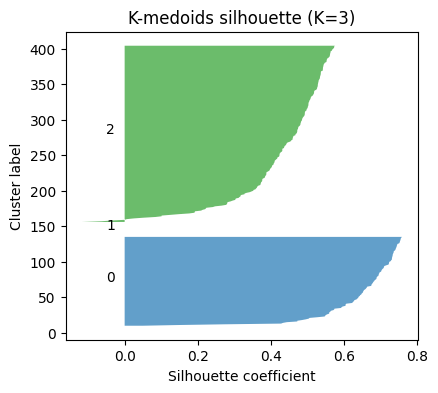

Number of clusters (K): 4
Medoids iniciales:
[[-6.59169697 -2.44779959]
 [-9.1267427  -4.46180568]
 [-1.96576392  5.23446451]
 [-9.37972697 -4.13752487]]

K-medoids Silhouette Score: 0.6486608287961805


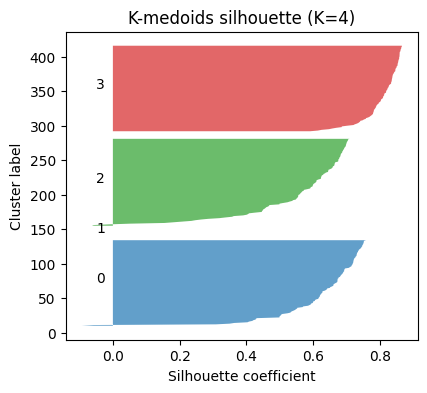

Number of clusters (K): 5
Medoids iniciales:
[[-10.37251719  -4.70331816]
 [ -1.6421505    3.28447114]
 [ -7.32033002  -2.73350095]
 [ -6.74672798  -8.17245974]
 [ -7.4443997   -9.1680318 ]]

K-medoids Silhouette Score: 0.5560521101796753


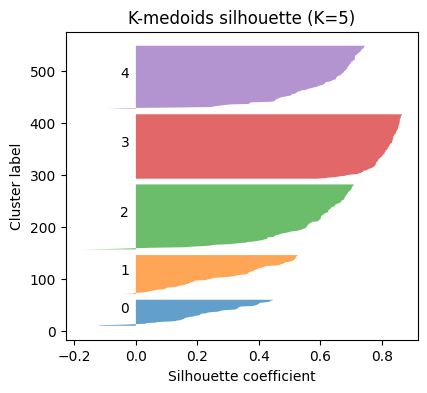

In [66]:
from unsupervised.clusters.kmedoids import KMedoids

# Iterar sobre valores de K de 1 a 5
for K in range(2, 6):
    print(f"Number of clusters (K): {K}")

    # K-medoids
    kmedoids = KMedoids()  # Aquí se crea una instancia de la clase KMedoids
    kmedoids_clusters = kmedoids.fit(K, X)  # Llama al método fit de la instancia
    kmedoids_silhouette = silhouette_score(X, kmedoids_clusters)
    print("K-medoids Silhouette Score:", kmedoids_silhouette)

    # Plot Silhouette plot for K-medoids
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(f"K-medoids silhouette (K={K})")
    silhouette_scores = silhouette_samples(X, kmedoids_clusters)
    y_lower = 10
    
    for i in range(K):
        ith_cluster_silhouette_values = silhouette_scores[kmedoids_clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.xlabel("Silhouette coefficient")
    plt.ylabel("Cluster label")
    plt.show()


# 6. Create different types of data

In [67]:
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

En cada data set *X* es una matriz de 500 filas y dos columas, representando las coordenadas *x* y *y* de los puntos. Es decir, contiene 500 pares de puntos. Además,*y* es un vector que contiene las etiquetas correspondientes a cada punto de datos. 
- noisy_circles: las etiquetas representan si el punto hace parte del círculo interior o exterior.
- noisy_moons:las etiquetas representan si el punto hace parte del semicírculo superior o inferior.
- blobs: Las etiquetas representan los diferentes grupos o clusters a los que pertenecen los puntos.

### 6a. Plot the different datasets in separate figures. What can you say about them?

- mejorar aspecto de las figs, bordes, paleta de color


============ Noisy circles
Tamaño de X: (500, 2)
Size of y: (500,)

============ Noisy moons
Tamaño de X: (500, 2)
Size of y: (500,)

============ Blobs
Tamaño de X: (500, 2)
Size of y: (500,)

============ No structure
Tamaño de X: (500, 2)
Size of y: No labels in this dataset

============ Aniso (blobs transformed)
Tamaño de X: (500, 2)
Size of y: (500,)

============ Varied
Tamaño de X: (500, 2)
Size of y: (500,)


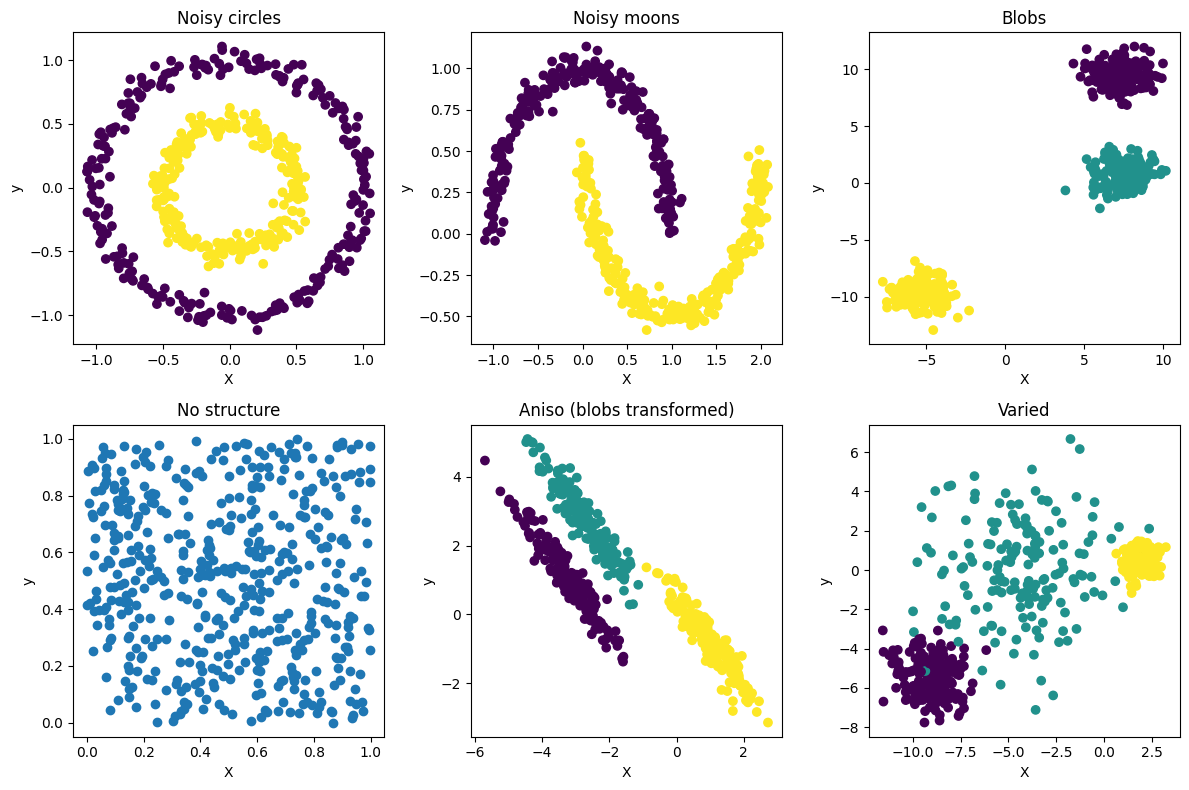

In [68]:
# Definir variables
datasets_list = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
titles = ['Noisy circles', 'Noisy moons', 'Blobs', 'No structure', 'Aniso (blobs transformed)', 'Varied']

# Graficar los diferentes conjuntos de datos
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, dataset in enumerate(datasets_list):
    row = i // 3
    col = i % 3
    X, y = dataset
    axs[row, col].scatter(X[:, 0], X[:, 1], c=y)
    axs[row, col].set_title(titles[i])
    axs[row, col].set_xlabel('X')
    axs[row, col].set_ylabel('y')
    
    print('\n'+f"==" * 6 + f" {titles[i]}")
    print("Tamaño de X:", X.shape)
    print("Size of y:", y.shape if y is not None else "No labels in this dataset")
    
plt.tight_layout()
plt.show()

### 6b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset

- why n_clusters = 2
- interpretar silueta, comparar
- porque DBSCAN sin silueta
- falta kmediods


In [69]:
# Define the number of clusters for the algorithms
n_clusters = 2

# Define the list of clustering algorithms to compare
algorithms = ['KMeans', 'KMedoids','DBSCAN','Spectral']
print(f"Silhouette score comparision")

# Apply every clustering algorithm to each dataset
for i, dataset in enumerate(datasets_list):
    X, _ = dataset
    
    print(f"\n=== Dataset: {titles[i]}")
    for algorithm in algorithms:
        labels, score = clustering_algorithm(X, algorithm, n_clusters=n_clusters)
        print(f"{algorithm}: {score}")


Silhouette score comparision

=== Dataset: Noisy circles


TypeError: KMedoids.__init__() got an unexpected keyword argument 'n_clusters'

# Bibliografy 

#### K-means
- https://dev.to/sajal2692/coding-k-means-clustering-using-python-and-numpy-fg1
- https://github.com/rushter/MLAlgorithms/blob/035e489a879d01a84fffff74885dc6b1bca3c96f/mla/kmeans.py
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py
